# E-Commerce Product Price Prediction-MachineHack

In [1]:
import pandas as pd
import numpy as np
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


In [4]:
test=pd.read_csv('test.csv')

In [5]:
test.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date
0,P-11284,B-2984,computers,network components,routers,4.3,1/12/2018
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.0,20/12/2012
2,P-5843,B-3078,clothing,women s clothing,western wear,1.5,1/12/2014
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.9,1/12/2019
4,P-5586,B-3078,clothing,women s clothing,western wear,1.4,1/12/2017


In [6]:
#concating train and test datasets
all_data=pd.concat([df,test])

In [7]:
all_data.head()

,Date,Item_Category,Item_Rating,Product,Product_Brand,Selling_Price,Subcategory_1,Subcategory_2
0,2/3/2017,bags wallets belts,4.3,P-2610,B-659,291.0,bags,hand bags
1,7/1/2015,clothing,3.1,P-2453,B-3078,897.0,women s clothing,western wear
2,1/12/2019,home decor festive needs,3.5,P-6802,B-1810,792.0,showpieces,ethnic
3,12/12/2014,beauty and personal care,4.0,P-4452,B-3078,837.0,eye care,h2o plus eye care
4,12/12/2013,clothing,4.3,P-8454,B-3078,470.0,men s clothing,t shirts


### Since it is a Regression Problem hence we will check the Skewness of Target Variable

In [9]:
import seaborn as sns
sns.distplot(df['Selling_Price'])

In [10]:
df['Selling_Price']=np.log1p(df['Selling_Price'])

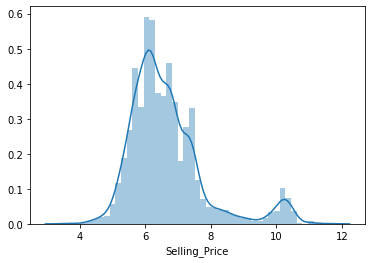

In [11]:
import seaborn as sns
sns.distplot(df['Selling_Price'])

In [12]:
df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,5.676754
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,6.800170
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,6.675823
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,6.731018
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,6.154858


In [13]:
# Extracting Date Feature in both Train and Test

In [14]:
def get_date_features(df):
    df['Date'] = pd.to_datetime(df["Date"])
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
#get_date_features(df)
#get_date_features(test)
get_date_features(all_data)

In [15]:
def extract_more_features(df):
    df[f'n_days_from_start'] = (df['Date'].dt.date - df['Date'].min().date()).dt.days
    df[f'n_weeks_from_start'] = (df['Date'].dt.date - df['Date'].min().date()).dt.days//7
    df[f'n_days_from_end'] = (df['Date'].max().date() - df['Date'].dt.date).dt.days
    df[f'n_weeks_from_end'] = (df['Date'].max().date() - df['Date'].dt.date).dt.days//7
#extract_more_features(df)
#extract_more_features(test)
extract_more_features(all_data)


In [16]:
all_data.head()

,Date,Item_Category,Item_Rating,Product,Product_Brand,Selling_Price,Subcategory_1,Subcategory_2,year,month,day,n_days_from_start,n_weeks_from_start,n_days_from_end,n_weeks_from_end
0,2017-02-03,bags wallets belts,4.3,P-2610,B-659,291.0,bags,hand bags,2017,2,3,1849,264,1402,200
1,2015-07-01,clothing,3.1,P-2453,B-3078,897.0,women s clothing,western wear,2015,7,1,1266,180,1985,283
2,2019-01-12,home decor festive needs,3.5,P-6802,B-1810,792.0,showpieces,ethnic,2019,1,12,2557,365,694,99
3,2014-12-12,beauty and personal care,4.0,P-4452,B-3078,837.0,eye care,h2o plus eye care,2014,12,12,1065,152,2186,312
4,2013-12-12,clothing,4.3,P-8454,B-3078,470.0,men s clothing,t shirts,2013,12,12,700,100,2551,364


In [17]:
#df.sort_values(by='Date',inplace=True)

In [18]:
#test.sort_values(by='Date',inplace=True)

#test.drop('Date',1,inplace=True)
test.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date
0,P-11284,B-2984,computers,network components,routers,4.3,1/12/2018
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.0,20/12/2012
2,P-5843,B-3078,clothing,women s clothing,western wear,1.5,1/12/2014
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.9,1/12/2019
4,P-5586,B-3078,clothing,women s clothing,western wear,1.4,1/12/2017


In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3503 entries, 0 to 1050
Data columns (total 15 columns):
Date                  3503 non-null datetime64[ns]
Item_Category         3503 non-null object
Item_Rating           3503 non-null float64
Product               3503 non-null object
Product_Brand         3503 non-null object
Selling_Price         2452 non-null float64
Subcategory_1         3503 non-null object
Subcategory_2         3503 non-null object
year                  3503 non-null int64
month                 3503 non-null int64
day                   3503 non-null int64
n_days_from_start     3503 non-null int64
n_weeks_from_start    3503 non-null int64
n_days_from_end       3503 non-null int64
n_weeks_from_end      3503 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(7), object(5)
memory usage: 437.9+ KB


In [20]:
all_data['Item_Category'].value_counts().head()

clothing      1037
jewellery      601
automotive     268
footwear       247
computers      148
Name: Item_Category, dtype: int64

In [21]:
# Cerating the Item and Sub category Count Feature for train and test

In [22]:
def extract_category_features(df):
    df["Item_Category_Count"] = df["Item_Category"].map(df["Item_Category"].value_counts())
    df["Subcategory_1_Count"] = df["Subcategory_1"].map(df["Subcategory_1"].value_counts())
    df["Subcategory_2_Count"] = df["Subcategory_2"].map(df["Subcategory_2"].value_counts())
#extract_category_features(df)
#extract_category_features(test)
extract_category_features(all_data)

In [23]:
all_data.head()

,Date,Item_Category,Item_Rating,Product,Product_Brand,Selling_Price,Subcategory_1,Subcategory_2,year,month,day,n_days_from_start,n_weeks_from_start,n_days_from_end,n_weeks_from_end,Item_Category_Count,Subcategory_1_Count,Subcategory_2_Count
0,2017-02-03,bags wallets belts,4.3,P-2610,B-659,291.0,bags,hand bags,2017,2,3,1849,264,1402,200,54,40,17
1,2015-07-01,clothing,3.1,P-2453,B-3078,897.0,women s clothing,western wear,2015,7,1,1266,180,1985,283,1037,695,384
2,2019-01-12,home decor festive needs,3.5,P-6802,B-1810,792.0,showpieces,ethnic,2019,1,12,2557,365,694,99,138,45,19
3,2014-12-12,beauty and personal care,4.0,P-4452,B-3078,837.0,eye care,h2o plus eye care,2014,12,12,1065,152,2186,312,111,2,1
4,2013-12-12,clothing,4.3,P-8454,B-3078,470.0,men s clothing,t shirts,2013,12,12,700,100,2551,364,1037,243,87


In [24]:
print("CHecking the Features of Train and Test:",all_data.shape[1])

CHecking the Features of Train and Test: 18


In [26]:
# Extracting Item Category Bassed on Item Rating

In [27]:
def extract_item_rating(df):
    df['Avg_Item_Cat_Rating'] =df["Item_Category"].map(df.groupby("Item_Category").Item_Rating.mean())
    df['Avg_Sub_category_1_Rating'] =df["Subcategory_1"].map(df.groupby("Subcategory_1").Item_Rating.mean())
    df['Avg_Sub_category_2_Rating'] =df["Subcategory_2"].map(df.groupby("Subcategory_2").Item_Rating.mean())
extract_item_rating(all_data)

In [28]:
# Maping them in to ItemCategory count with new Features

In [29]:
def extract_unique_features(df):
    df["uni_sub_cat_1"] = df["Item_Category"].map(df.groupby("Item_Category").Subcategory_1.nunique())
    df["uni_sub_cat_2"] = df["Item_Category"].map(df.groupby("Item_Category").Subcategory_1.nunique())
    df["uni_Prod_Brand"] =df["Item_Category"].map(df.groupby("Item_Category").Product_Brand.nunique())
#extract_unique_features(df)
#extract_unique_features(test)
extract_unique_features(all_data)

In [30]:
all_data.head()

,Date,Item_Category,Item_Rating,Product,Product_Brand,Selling_Price,Subcategory_1,Subcategory_2,year,month,...,n_weeks_from_end,Item_Category_Count,Subcategory_1_Count,Subcategory_2_Count,Avg_Item_Cat_Rating,Avg_Sub_category_1_Rating,Avg_Sub_category_2_Rating,uni_sub_cat_1,uni_sub_cat_2,uni_Prod_Brand
0,2017-02-03,bags wallets belts,4.3,P-2610,B-659,291.0,bags,hand bags,2017,2,...,200,54,40,17,3.501852,3.470000,3.758824,4,4,30
1,2015-07-01,clothing,3.1,P-2453,B-3078,897.0,women s clothing,western wear,2015,7,...,283,1037,695,384,3.066345,3.094101,3.170052,3,3,280
2,2019-01-12,home decor festive needs,3.5,P-6802,B-1810,792.0,showpieces,ethnic,2019,1,...,99,138,45,19,3.097826,3.197778,2.773684,11,11,106
3,2014-12-12,beauty and personal care,4.0,P-4452,B-3078,837.0,eye care,h2o plus eye care,2014,12,...,312,111,2,1,2.915315,3.550000,4.000000,8,8,26
4,2013-12-12,clothing,4.3,P-8454,B-3078,470.0,men s clothing,t shirts,2013,12,...,364,1037,243,87,3.066345,3.005761,2.951724,3,3,280


In [31]:
df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,5.676754
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,6.800170
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,6.675823
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,6.731018
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,6.154858


In [32]:
all_data.shape[1]

24

In [33]:
print("No of feature Extracted in Train:",all_data.shape[1])
#print("No of feature Extracted in Test:",test.shape[1])

No of feature Extracted in Train: 24


In [34]:
# Checking the nul Values:
all_data.isnull().sum()

Date                            0
Item_Category                   0
Item_Rating                     0
Product                         0
Product_Brand                   0
Selling_Price                1051
Subcategory_1                   0
Subcategory_2                   0
year                            0
month                           0
day                             0
n_days_from_start               0
n_weeks_from_start              0
n_days_from_end                 0
n_weeks_from_end                0
Item_Category_Count             0
Subcategory_1_Count             0
Subcategory_2_Count             0
Avg_Item_Cat_Rating             0
Avg_Sub_category_1_Rating       0
Avg_Sub_category_2_Rating       0
uni_sub_cat_1                   0
uni_sub_cat_2                   0
uni_Prod_Brand                  0
dtype: int64

## Checking the Object Type Data Type and Encoding them

In [35]:
all_data.select_dtypes(include=['object']).head()

,Item_Category,Product,Product_Brand,Subcategory_1,Subcategory_2
0,bags wallets belts,P-2610,B-659,bags,hand bags
1,clothing,P-2453,B-3078,women s clothing,western wear
2,home decor festive needs,P-6802,B-1810,showpieces,ethnic
3,beauty and personal care,P-4452,B-3078,eye care,h2o plus eye care
4,clothing,P-8454,B-3078,men s clothing,t shirts


In [36]:
from sklearn.preprocessing import LabelEncoder

def encoding_categorical_features(df):
    le = LabelEncoder()
    df['Product'] = le.fit_transform(df['Product'])
    df['Product_Brand'] = le.fit_transform(df['Product_Brand'])
    df['Item_Category'] = le.fit_transform(df['Item_Category'])
    df['Subcategory_1'] = le.fit_transform(df['Subcategory_1'])
    df['Subcategory_2'] = le.fit_transform(df['Subcategory_2'])

#encoding_categorical_features(df)#Train data
#encoding_categorical_features(test)# Test data
encoding_categorical_features(all_data)# Test data

In [37]:
all_data.head()

,Date,Item_Category,Item_Rating,Product,Product_Brand,Selling_Price,Subcategory_1,Subcategory_2,year,month,...,n_weeks_from_end,Item_Category_Count,Subcategory_1_Count,Subcategory_2_Count,Avg_Item_Cat_Rating,Avg_Sub_category_1_Rating,Avg_Sub_category_2_Rating,uni_sub_cat_1,uni_sub_cat_2,uni_Prod_Brand
0,2017-02-03,9,4.3,1154,1130,291.0,11,159,2017,2,...,200,54,40,17,3.501852,3.470000,3.758824,4,4,30
1,2015-07-01,17,3.1,1109,877,897.0,139,387,2015,7,...,283,1037,695,384,3.066345,3.094101,3.170052,3,3,280
2,2019-01-12,38,3.5,2499,369,792.0,119,118,2019,1,...,99,138,45,19,3.097826,3.197778,2.773684,11,11,106
3,2014-12-12,12,4.0,1732,877,837.0,40,155,2014,12,...,312,111,2,1,2.915315,3.550000,4.000000,8,8,26
4,2013-12-12,17,4.3,3016,877,470.0,86,344,2013,12,...,364,1037,243,87,3.066345,3.005761,2.951724,3,3,280


### Assign X and Y value

In [39]:
x_train=all_data.iloc[:2452,:]
y=df['Selling_Price']
test=all_data.iloc[2452:,:]

In [40]:
# droping features from train
x_train.drop(['Date','Product','Selling_Price'],1,inplace=True)

In [41]:
x_train.head()

,Item_Category,Item_Rating,Product_Brand,Subcategory_1,Subcategory_2,year,month,day,n_days_from_start,n_weeks_from_start,...,n_weeks_from_end,Item_Category_Count,Subcategory_1_Count,Subcategory_2_Count,Avg_Item_Cat_Rating,Avg_Sub_category_1_Rating,Avg_Sub_category_2_Rating,uni_sub_cat_1,uni_sub_cat_2,uni_Prod_Brand
0,9,4.3,1130,11,159,2017,2,3,1849,264,...,200,54,40,17,3.501852,3.470000,3.758824,4,4,30
1,17,3.1,877,139,387,2015,7,1,1266,180,...,283,1037,695,384,3.066345,3.094101,3.170052,3,3,280
2,38,3.5,369,119,118,2019,1,12,2557,365,...,99,138,45,19,3.097826,3.197778,2.773684,11,11,106
3,12,4.0,877,40,155,2014,12,12,1065,152,...,312,111,2,1,2.915315,3.550000,4.000000,8,8,26
4,17,4.3,877,86,344,2013,12,12,700,100,...,364,1037,243,87,3.066345,3.005761,2.951724,3,3,280


In [42]:
#droping features from test
test.drop(['Date','Product','Selling_Price'],1,inplace=True)

In [43]:
test.head()

,Item_Category,Item_Rating,Product_Brand,Subcategory_1,Subcategory_2,year,month,day,n_days_from_start,n_weeks_from_start,...,n_weeks_from_end,Item_Category_Count,Subcategory_1_Count,Subcategory_2_Count,Avg_Item_Cat_Rating,Avg_Sub_category_1_Rating,Avg_Sub_category_2_Rating,uni_sub_cat_1,uni_sub_cat_2,uni_Prod_Brand
0,20,4.3,842,94,298,2018,1,12,2192,313,...,151,148,55,54,3.407432,3.610909,3.605556,8,8,66
1,44,3.0,335,12,53,2012,12,20,343,49,...,415,601,114,45,3.006822,3.107895,2.944444,10,10,268
2,17,1.5,877,139,387,2014,1,12,731,104,...,360,1037,695,384,3.066345,3.094101,3.170052,3,3,280
3,44,3.9,203,93,243,2019,1,12,2557,365,...,99,601,221,219,3.006822,3.061538,3.050228,10,10,268
4,17,1.4,877,139,387,2017,1,12,1827,261,...,203,1037,695,384,3.066345,3.094101,3.170052,3,3,280


In [44]:
x_train.shape,y.shape,test.shape

((2452, 21), (2452,), (1051, 21))

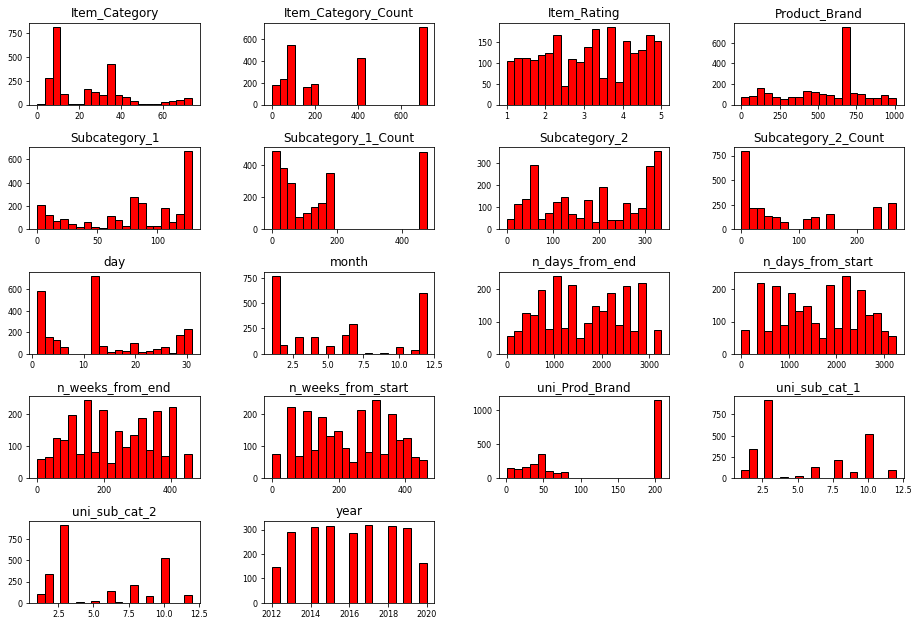

In [379]:
x.hist(bins=20, color='red', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2.2, 2.2))

## Now Building base model and checking Feature Importance:

In [150]:
# Fitting base modeland checking feature importance
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=1500,learning_rate=0.06,max_depth=6)
xgb.fit(x_train,y)

[22:18:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

#### Checking Feature Importance

In [152]:
# Based on the feature Importance selecting the bellow features
xgb.feature_importances_

array([0.01046089, 0.00555183, 0.01234151, 0.01692461, 0.02642732,
       0.00574247, 0.02137481, 0.02161087, 0.00930275, 0.        ,
       0.        , 0.        , 0.02439873, 0.4105016 , 0.01832811,
       0.01672271, 0.33462003, 0.01933332, 0.02201787, 0.        ,
       0.02434058], dtype=float32)

In [153]:
df_feature_imp=pd.DataFrame({'Feature':x_train.columns,'XBR_Feat_imp':xgb.feature_importances_*100})
df_feature_imp

,Feature,XBR_Feat_imp
0,Item_Category,1.046089
1,Item_Rating,0.555183
2,Product_Brand,1.234151
3,Subcategory_1,1.692461
4,Subcategory_2,2.642732
5,year,0.574247
6,month,2.137481
7,day,2.161087
8,n_days_from_start,0.930275
9,n_weeks_from_start,0.000000


In [154]:
#taking features of feature Imp >1.5
df_feature_imp[df_feature_imp['XBR_Feat_imp']>1.5]

,Feature,XBR_Feat_imp
3,Subcategory_1,1.692461
4,Subcategory_2,2.642732
6,month,2.137481
7,day,2.161087
12,Item_Category_Count,2.439873
13,Subcategory_1_Count,41.050159
14,Subcategory_2_Count,1.832811
15,Avg_Item_Cat_Rating,1.672271
16,Avg_Sub_category_1_Rating,33.462002
17,Avg_Sub_category_2_Rating,1.933332


In [155]:
#Checking the features from the df_feature_imp data frame
df_feat=df_feature_imp[df_feature_imp['XBR_Feat_imp']>1.2]
cols=df_feat['Feature']

In [156]:
x1=x_train[cols]
x1.head()

,Product_Brand,Subcategory_1,Subcategory_2,month,day,Item_Category_Count,Subcategory_1_Count,Subcategory_2_Count,Avg_Item_Cat_Rating,Avg_Sub_category_1_Rating,Avg_Sub_category_2_Rating,uni_sub_cat_1,uni_Prod_Brand
0,1130,11,159,2,3,54,40,17,3.501852,3.470000,3.758824,4,30
1,877,139,387,7,1,1037,695,384,3.066345,3.094101,3.170052,3,280
2,369,119,118,1,12,138,45,19,3.097826,3.197778,2.773684,11,106
3,877,40,155,12,12,111,2,1,2.915315,3.550000,4.000000,8,26
4,877,86,344,12,12,1037,243,87,3.066345,3.005761,2.951724,3,280


In [158]:
#checking the null value
x1.isnull().sum()

Product_Brand                0
Subcategory_1                0
Subcategory_2                0
month                        0
day                          0
Item_Category_Count          0
Subcategory_1_Count          0
Subcategory_2_Count          0
Avg_Item_Cat_Rating          0
Avg_Sub_category_1_Rating    0
Avg_Sub_category_2_Rating    0
uni_sub_cat_1                0
uni_Prod_Brand               0
dtype: int64

In [159]:
#x1.replace([np.inf, -np.inf], np.nan).dropna(how="all",inplace=True)

In [160]:
#x2=x1.dropna()

In [161]:
# assigning the imp feature  on test1 for test data
test1=test[cols]
test1.head()

,Product_Brand,Subcategory_1,Subcategory_2,month,day,Item_Category_Count,Subcategory_1_Count,Subcategory_2_Count,Avg_Item_Cat_Rating,Avg_Sub_category_1_Rating,Avg_Sub_category_2_Rating,uni_sub_cat_1,uni_Prod_Brand
0,842,94,298,1,12,148,55,54,3.407432,3.610909,3.605556,8,66
1,335,12,53,12,20,601,114,45,3.006822,3.107895,2.944444,10,268
2,877,139,387,1,12,1037,695,384,3.066345,3.094101,3.170052,3,280
3,203,93,243,1,12,601,221,219,3.006822,3.061538,3.050228,10,268
4,877,139,387,1,12,1037,695,384,3.066345,3.094101,3.170052,3,280


In [162]:
x1.shape,test1.shape

((2452, 13), (1051, 13))

#### Model 1 : xgboost

In [163]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators=1500,learning_rate=0.06,max_depth=6,e)
xgb.fit(x1,y)

[22:21:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [168]:
%%time
# checking the CV
from sklearn.model_selection import cross_val_score
scoresdtpipe=cross_val_score(xgb,x1, y, cv=5,scoring='neg_root_mean_squared_error')
print("After Avg Cross Val R2")
print(np.mean(scoresdtpipe))

[22:23:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:23:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:23:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:23:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:23:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
After Avg Cross Val R2
-0.6787010054373753
Wall time: 21.5 s


In [169]:
scoresdtpipe

array([-0.7360248 , -0.65785107, -0.67779067, -0.62690672, -0.69493177])

#### Model Bilding using PIPELINE

In [196]:
%%time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,BaggingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
pipe = Pipeline((
("scaler", StandardScaler()),
("poly",PolynomialFeatures(degree=2)),
#("pca",PCA(n_components=10)),
 #("xgb",XGBRegressor(n_estimators=900,learning_rate=0.08,max_depth=6,early_stopping_rounds=100)),
("cat1",CatBoostRegressor(early_stopping_rounds=100))
#("gb1",lgb.LGBMRegressor(n_jobs=-1,n_estimators=10000,learning_rate=0.03,min_child_samples=2,metric='rmse'))
))
scoresdtpipe = cross_val_score(pipe,x1, y, cv=7,scoring='neg_root_mean_squared_error')

print("After Avg Cross Val R2")
print(np.mean(scoresdtpipe))
print(scoresdtpipe)

0:	learn: 1.1455691	total: 39.1ms	remaining: 39.1s
1:	learn: 1.1283183	total: 71.9ms	remaining: 35.9s
2:	learn: 1.1118322	total: 94.4ms	remaining: 31.4s
3:	learn: 1.0975146	total: 118ms	remaining: 29.4s
4:	learn: 1.0807781	total: 140ms	remaining: 27.8s
5:	learn: 1.0657115	total: 173ms	remaining: 28.7s
6:	learn: 1.0517493	total: 201ms	remaining: 28.5s
7:	learn: 1.0370299	total: 248ms	remaining: 30.7s
8:	learn: 1.0235578	total: 268ms	remaining: 29.5s
9:	learn: 1.0117284	total: 291ms	remaining: 28.8s
10:	learn: 0.9998334	total: 311ms	remaining: 27.9s
11:	learn: 0.9885203	total: 331ms	remaining: 27.3s
12:	learn: 0.9789382	total: 348ms	remaining: 26.5s
13:	learn: 0.9672784	total: 367ms	remaining: 25.8s
14:	learn: 0.9573065	total: 383ms	remaining: 25.2s
15:	learn: 0.9470553	total: 403ms	remaining: 24.8s
16:	learn: 0.9371548	total: 422ms	remaining: 24.4s
17:	learn: 0.9272485	total: 443ms	remaining: 24.2s
18:	learn: 0.9183498	total: 460ms	remaining: 23.7s
19:	learn: 0.9091211	total: 477ms	rema

In [197]:
pipe.fit(x1,y)

0:	learn: 1.1609805	total: 39.4ms	remaining: 39.3s
1:	learn: 1.1431265	total: 67.5ms	remaining: 33.7s
2:	learn: 1.1259091	total: 119ms	remaining: 39.7s
3:	learn: 1.1095663	total: 151ms	remaining: 37.6s
4:	learn: 1.0933573	total: 173ms	remaining: 34.5s
5:	learn: 1.0783689	total: 197ms	remaining: 32.7s
6:	learn: 1.0633191	total: 220ms	remaining: 31.2s
7:	learn: 1.0506756	total: 246ms	remaining: 30.5s
8:	learn: 1.0373729	total: 270ms	remaining: 29.8s
9:	learn: 1.0240843	total: 292ms	remaining: 28.9s
10:	learn: 1.0122778	total: 324ms	remaining: 29.2s
11:	learn: 0.9997805	total: 356ms	remaining: 29.3s
12:	learn: 0.9889406	total: 377ms	remaining: 28.6s
13:	learn: 0.9775542	total: 401ms	remaining: 28.3s
14:	learn: 0.9678685	total: 419ms	remaining: 27.5s
15:	learn: 0.9577297	total: 438ms	remaining: 26.9s
16:	learn: 0.9472029	total: 456ms	remaining: 26.3s
17:	learn: 0.9370516	total: 474ms	remaining: 25.9s
18:	learn: 0.9279771	total: 493ms	remaining: 25.4s
19:	learn: 0.9183561	total: 510ms	remai

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('cat1',
                 <catboost.core.CatBoostRegressor object at 0x000001DD00FDA198>)],
         verbose=False)

In [198]:
#predicting the result
y_pred_p1=pipe.predict(test1)
y_pred_p1

array([7.70592908, 6.12057273, 6.66003874, ..., 7.22722143, 6.00694559,
       7.22722143])

In [199]:
pred_pipe=np.expm1(y_pred_p1)

In [200]:
np.round(pred_pipe,3)

array([2220.48 ,  454.125,  779.581, ..., 1375.393,  405.241, 1375.393])

In [216]:
pred_final=np.expm1(pred_pipe)
np.round(pred_final,3)

array([2216.495,  442.609,  778.866, ..., 1398.522,  447.811, 1384.191])

In [217]:
submission['Selling_Price']=pred_final
submission.head()

,Selling_Price
0,2216.494810
1,442.608564
2,778.865969
3,360.696974
4,784.750201


In [218]:
file_name = 'Selling_Price_Pred__new_final.xlsx'
submission.to_excel(file_name, index=False)